In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os

In [2]:
# clusters : 'N','Y'
# frame/seg : 'F','S'
# cwt : '-','N','Y'
# window : '-','F','H'
# model : ['svm', 'RF', 'DNN', 'LSTM']

# [acc  ,FA  ,DR  ] ph7.4 train
# [acc.1,FA.1,DR.1] ph7.4 test
# [acc.2,FA.2,DR.2] ph7.4 true test
# [acc.3,FA.3,DR.3] sel 1 train
# [acc.4,FA.4,DR.4] sel 1 test
# [acc.5,FA.5,DR.5] sel 1 true test

# colors 'r','orange','y','g','c','b','m'

In [3]:
df = pd.read_csv('../final_data/result1.csv')

In [4]:
save_root = '../final_data/analysis_plot/'

C:\Users\x\AppData\Local\Temp\ipykernel_6644\147633177.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


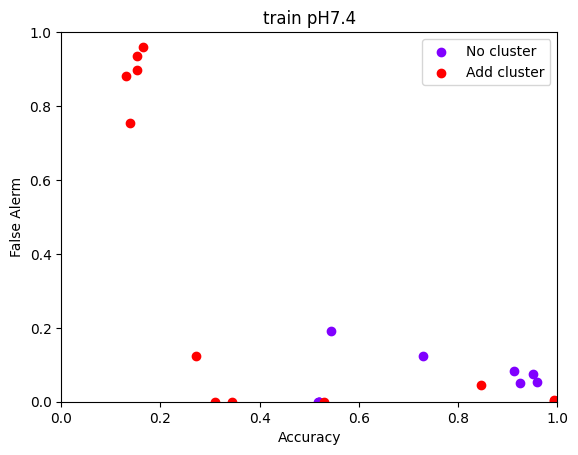

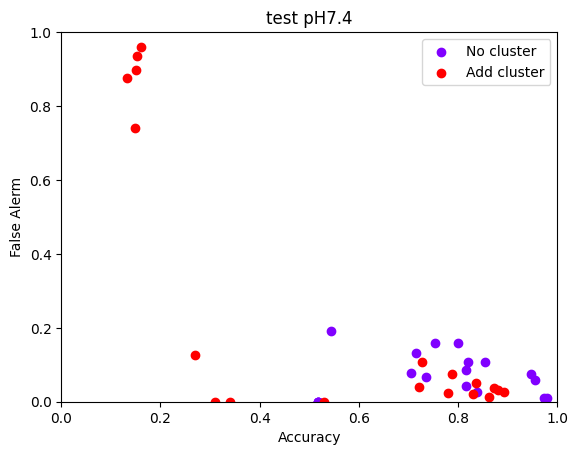

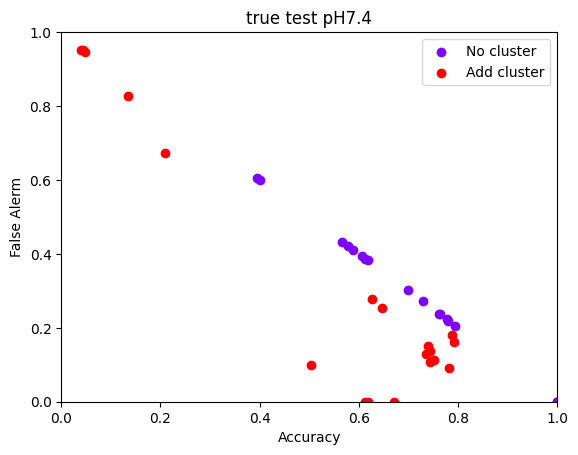

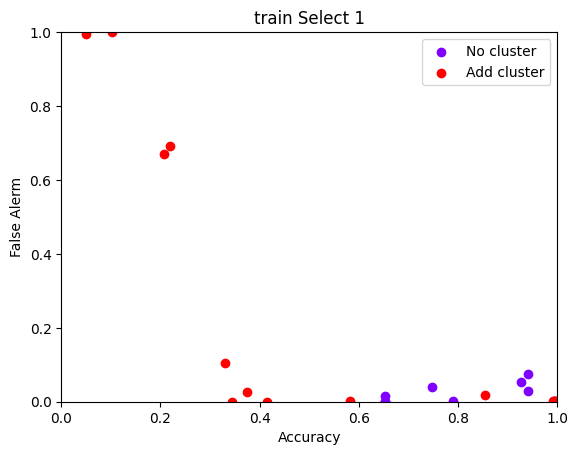

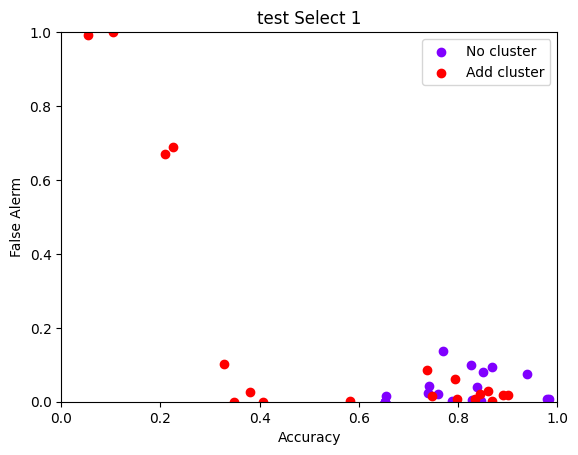

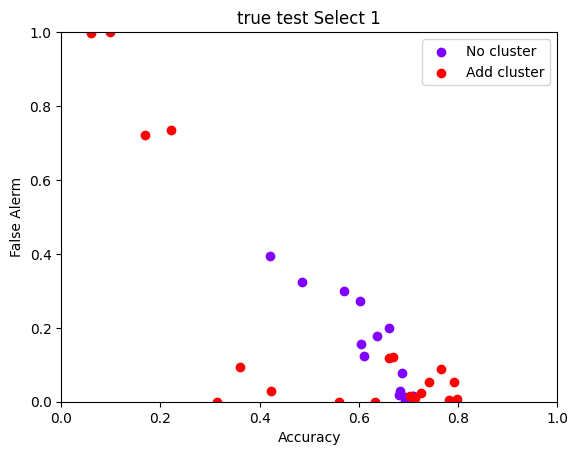

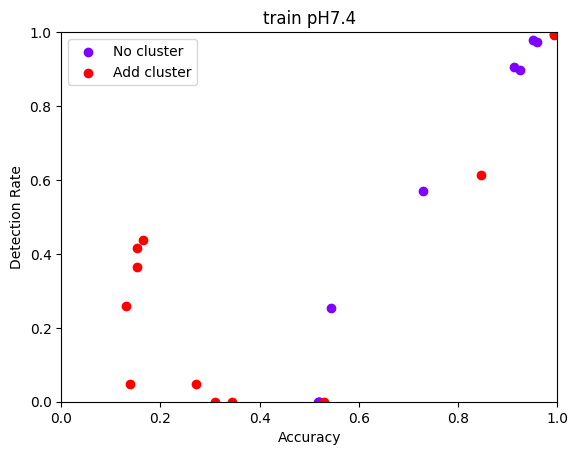

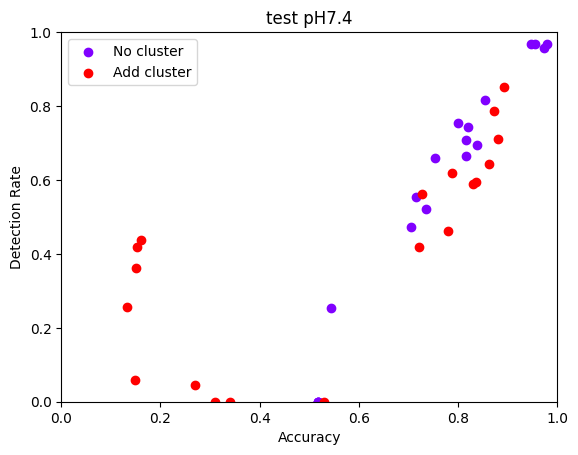

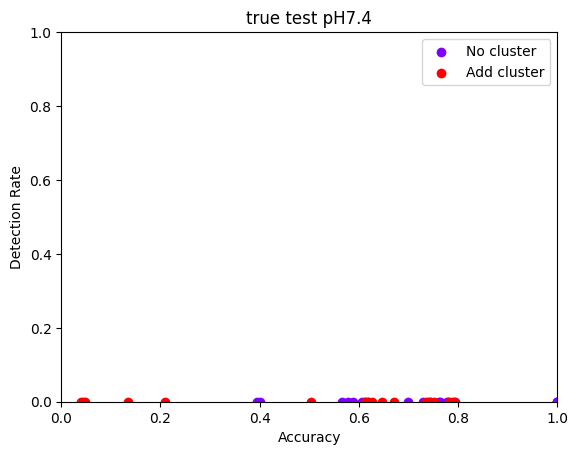

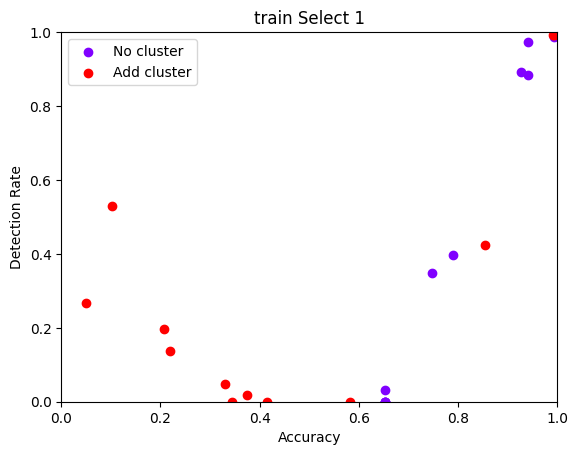

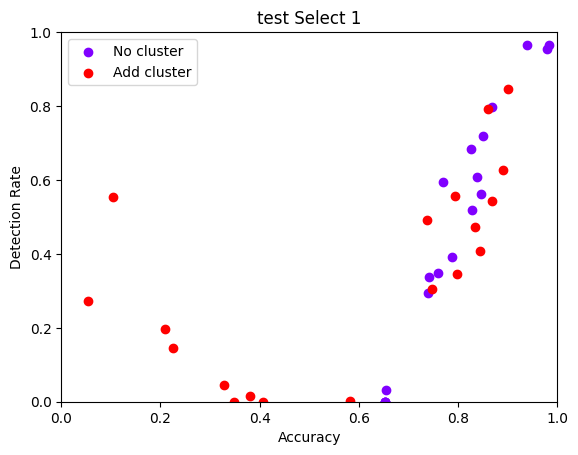

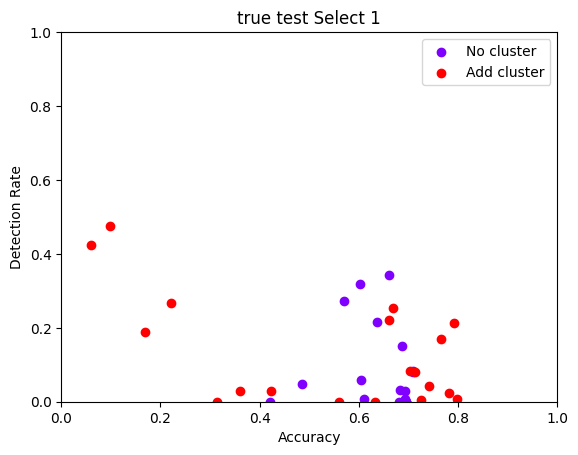

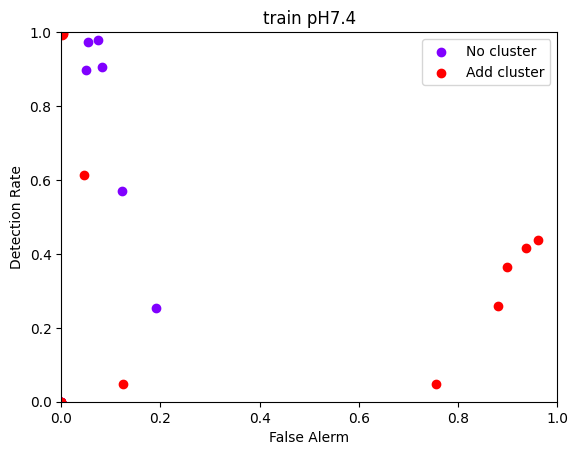

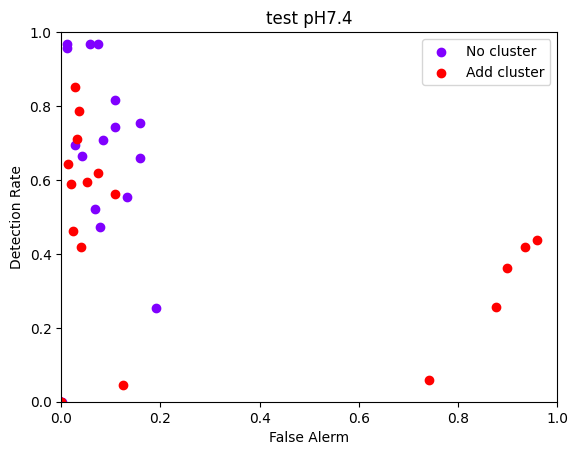

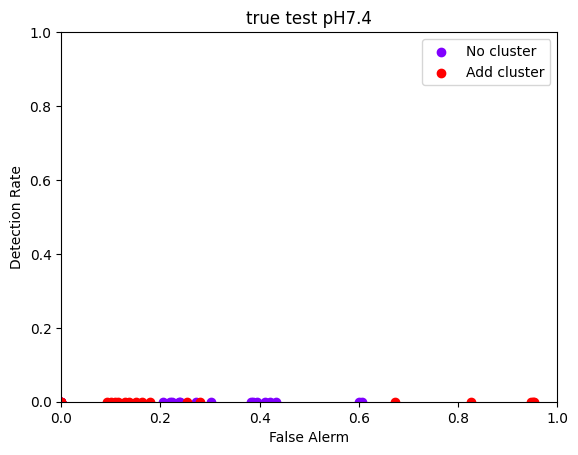

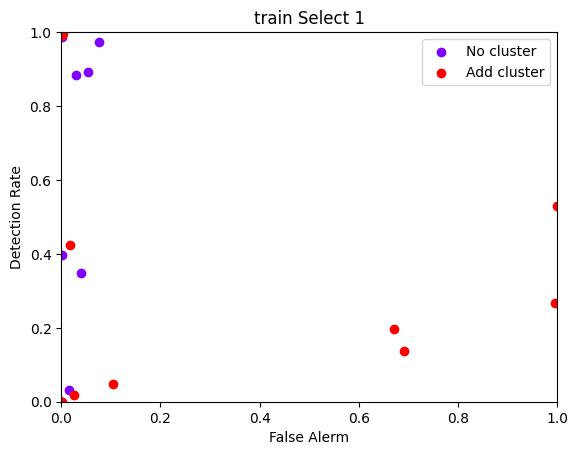

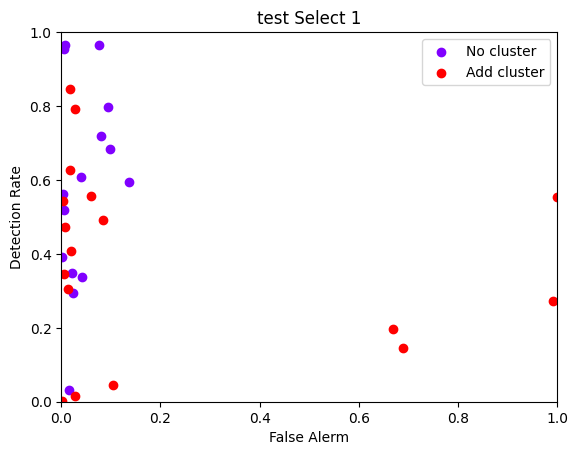

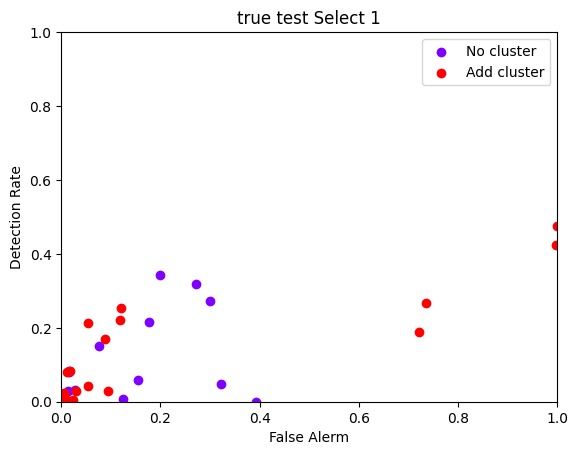

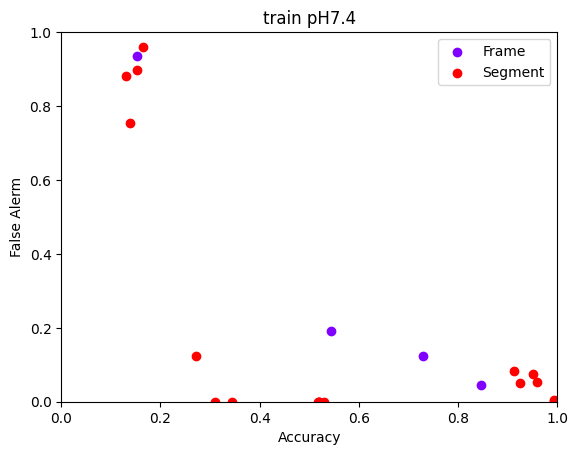

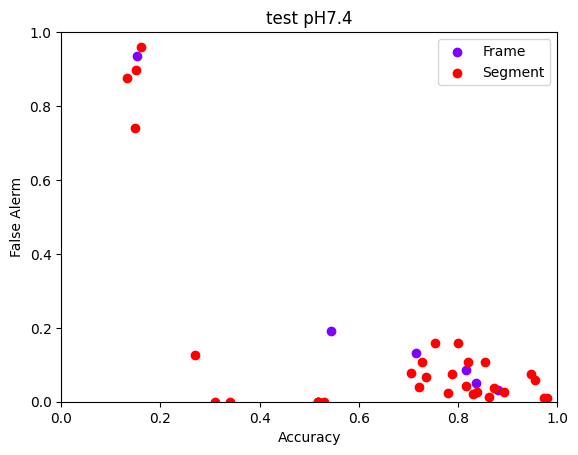

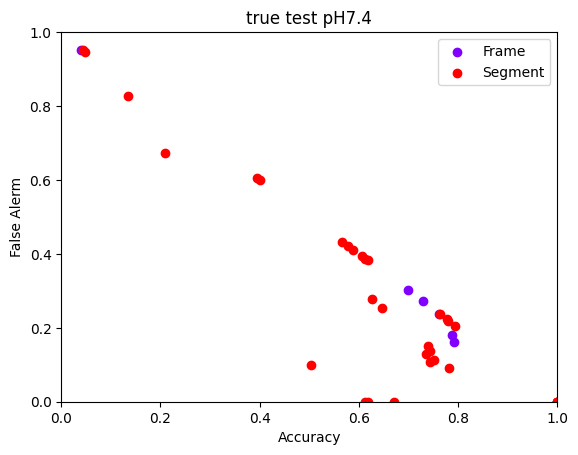

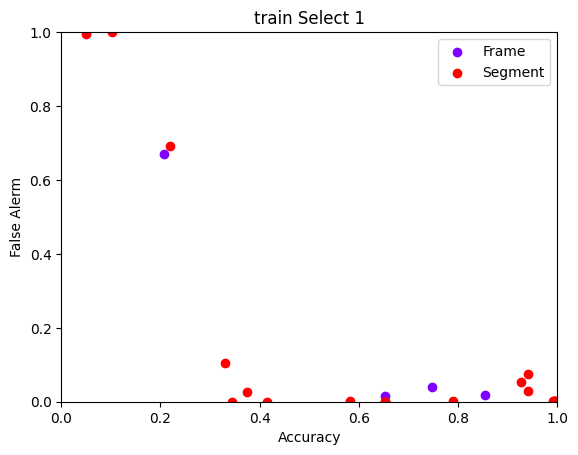

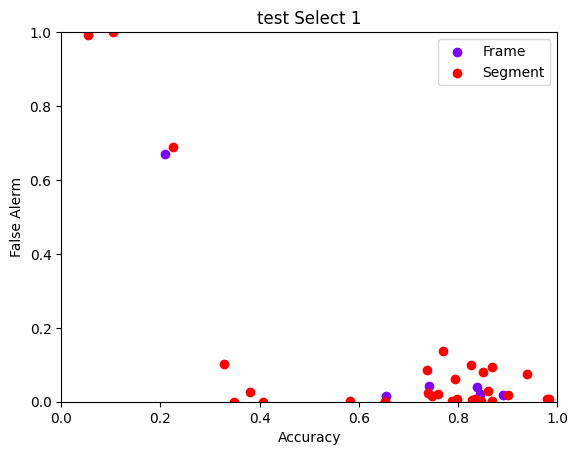

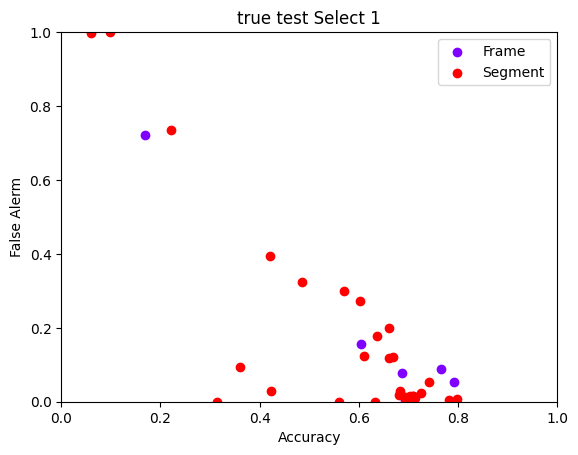

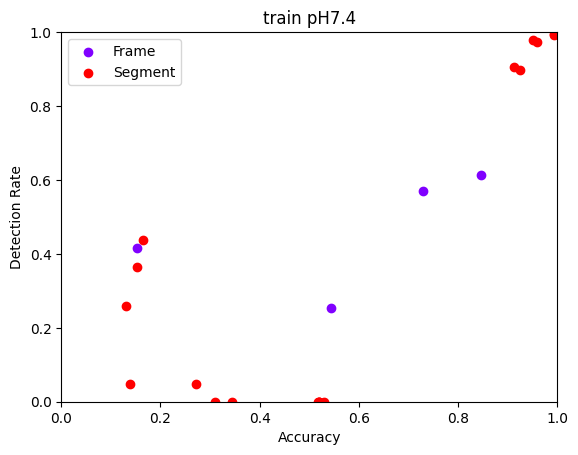

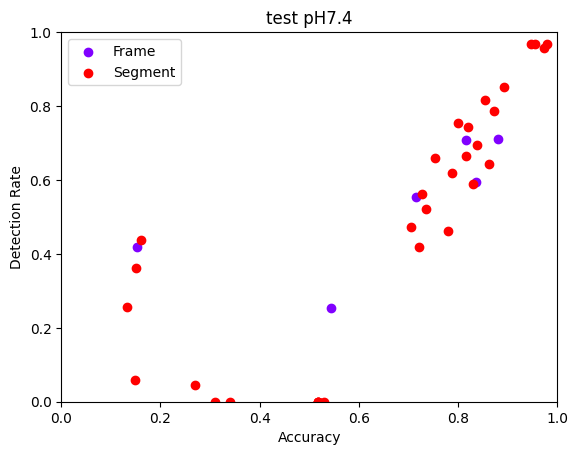

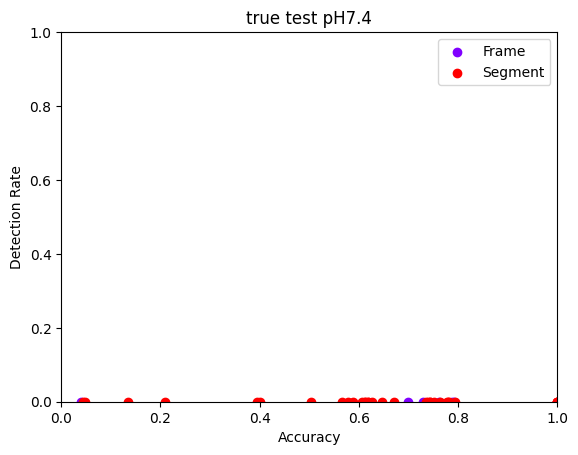

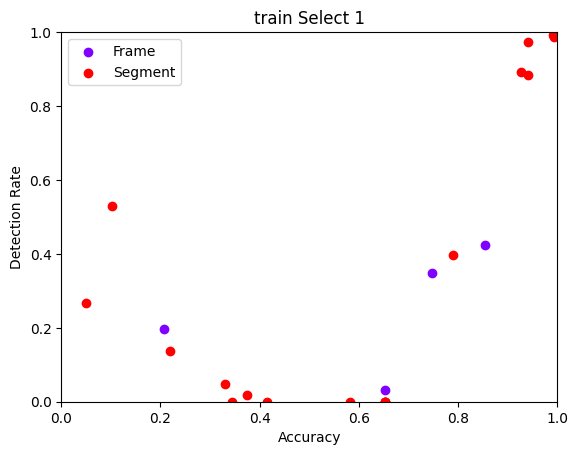

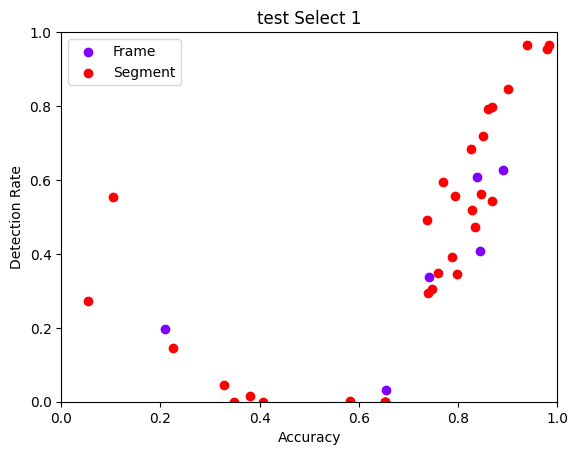

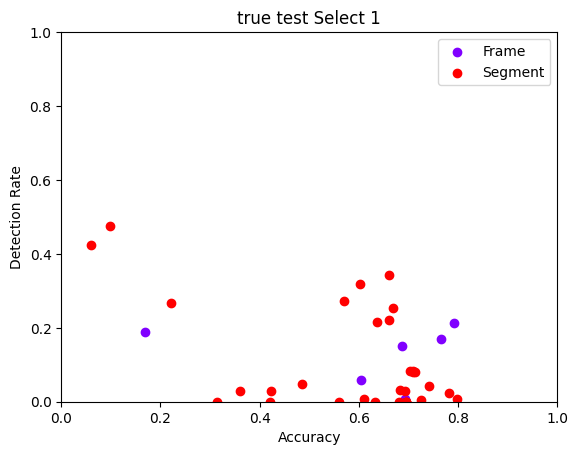

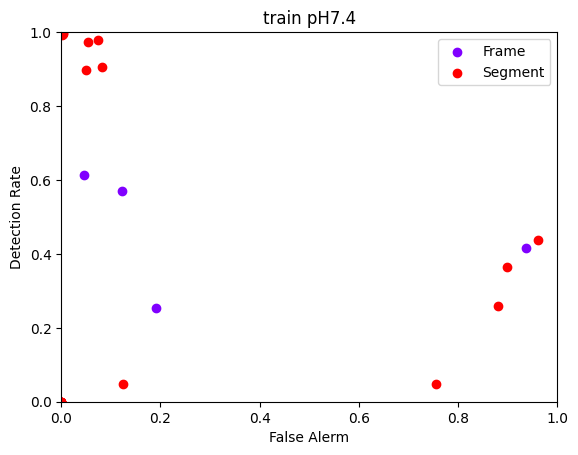

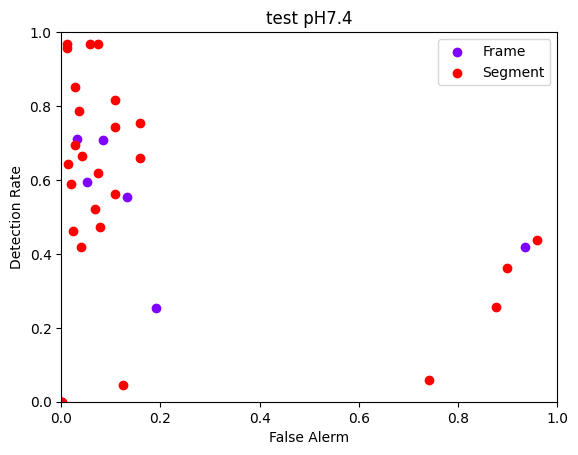

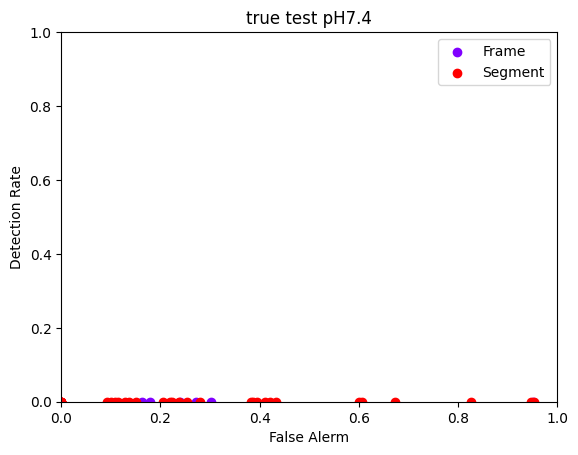

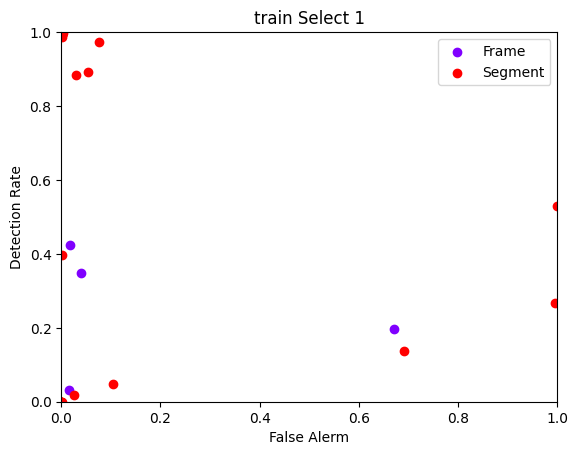

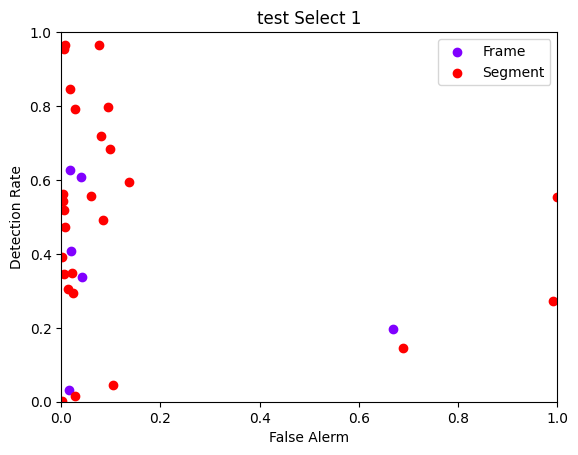

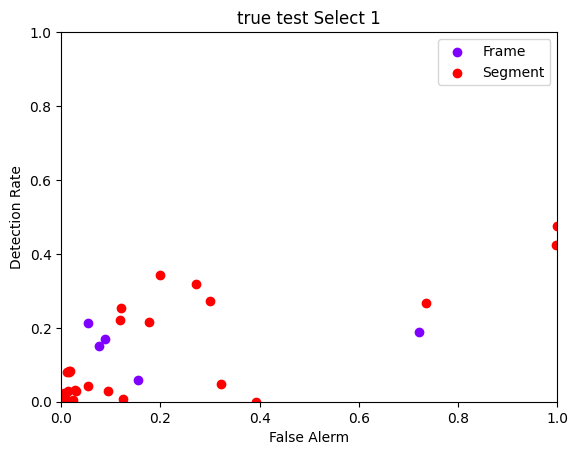

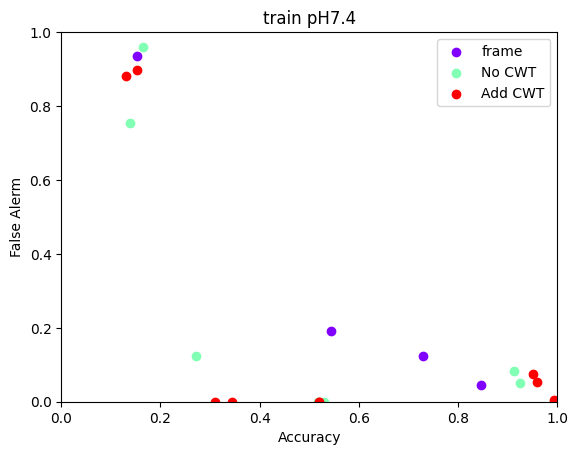

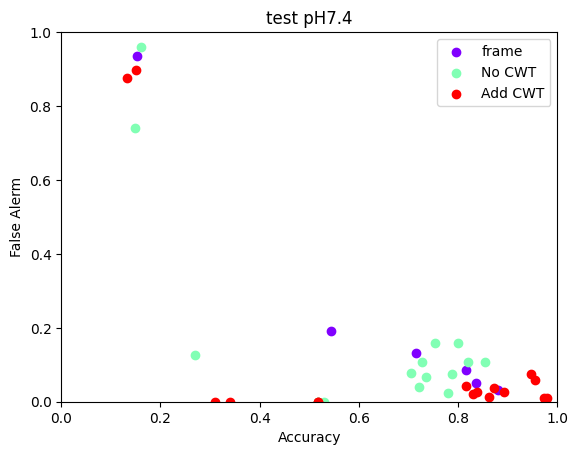

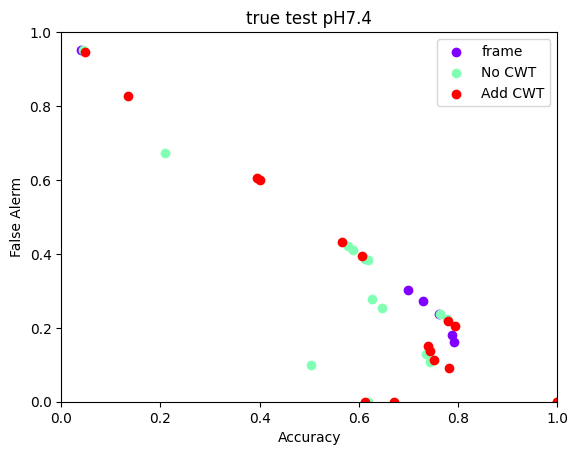

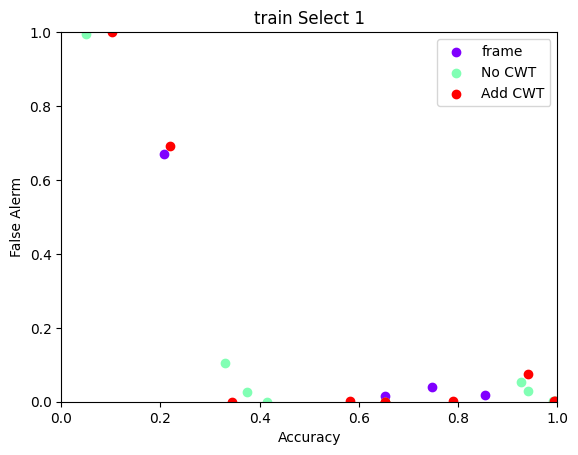

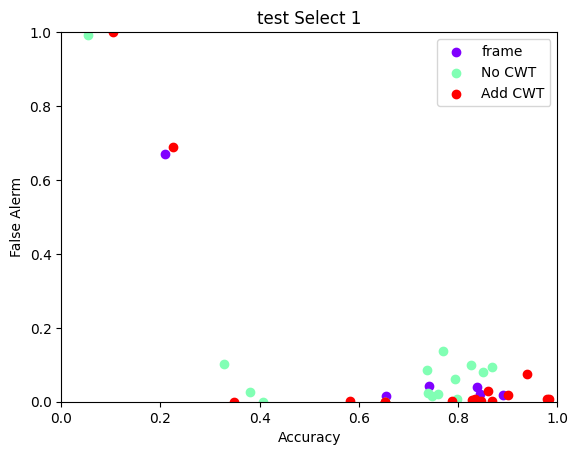

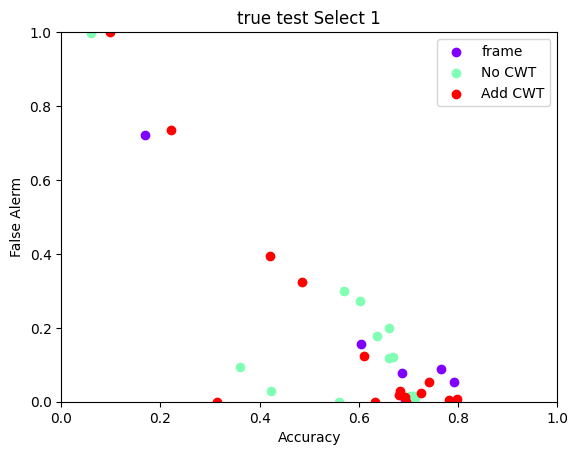

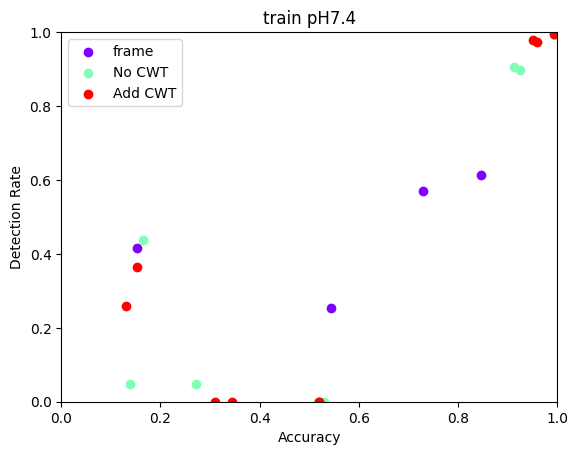

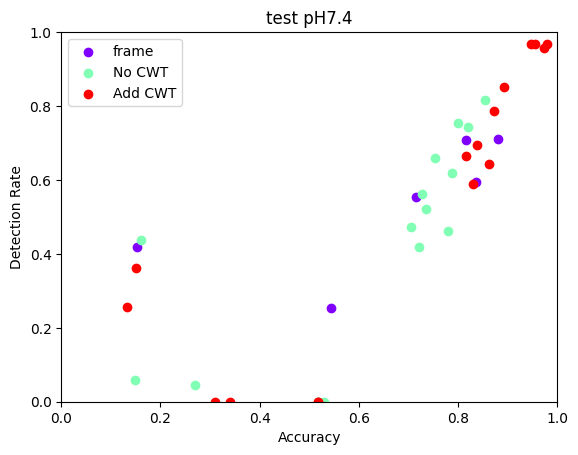

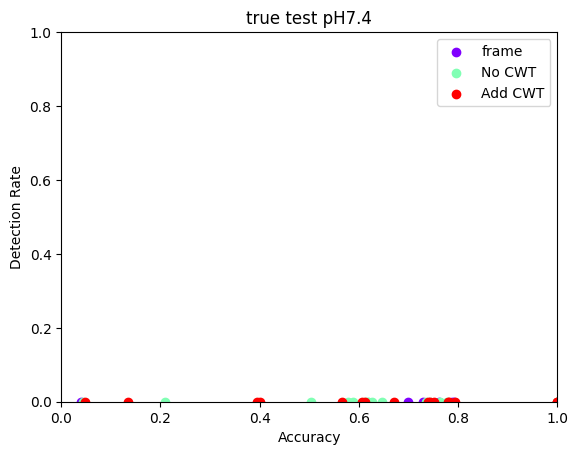

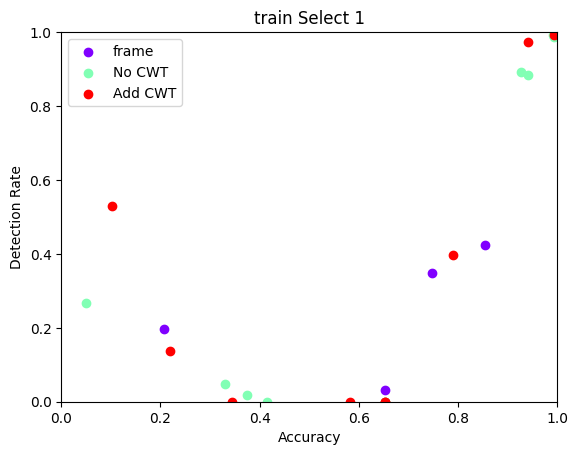

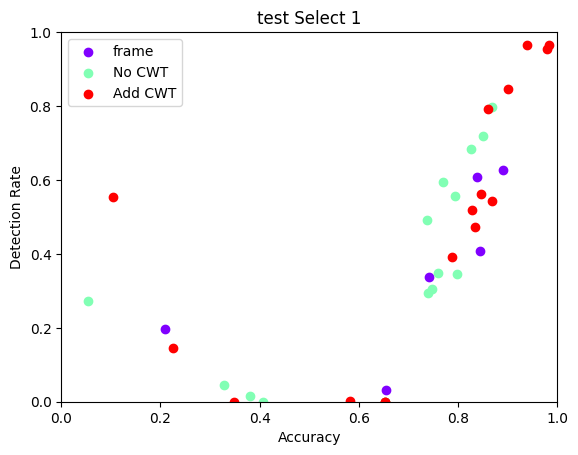

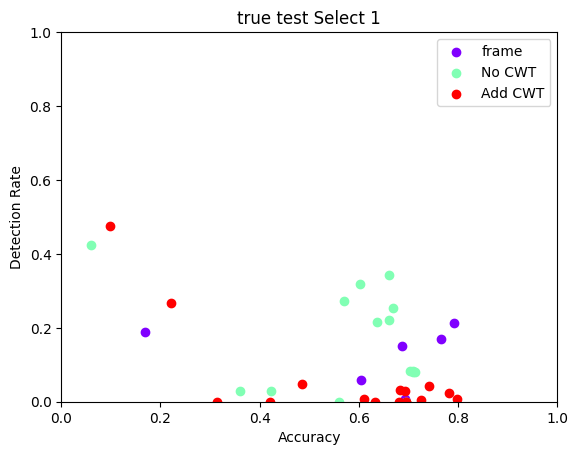

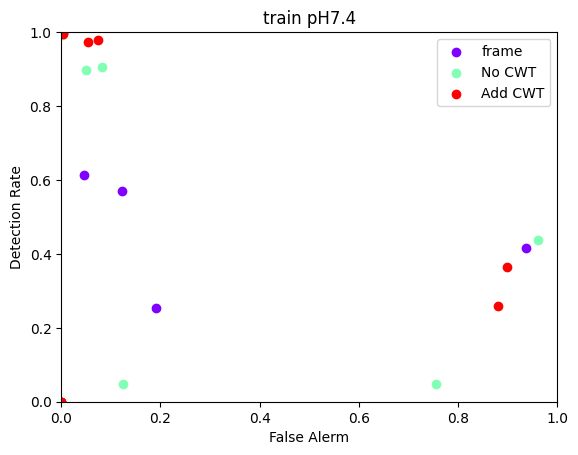

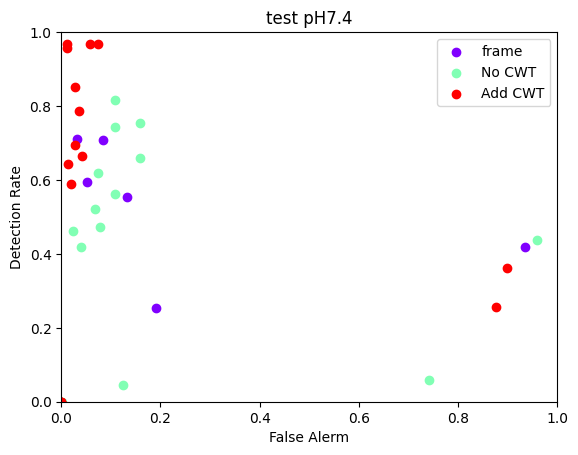

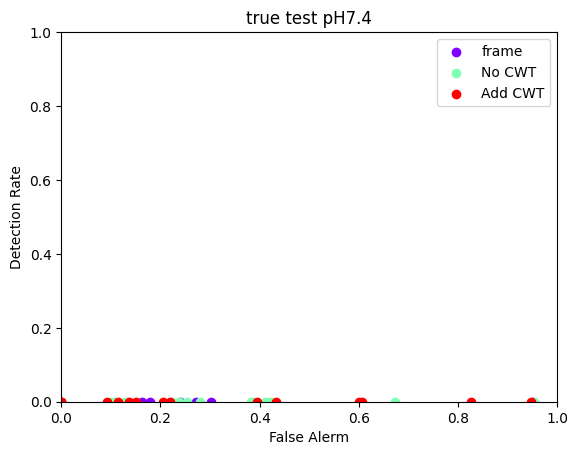

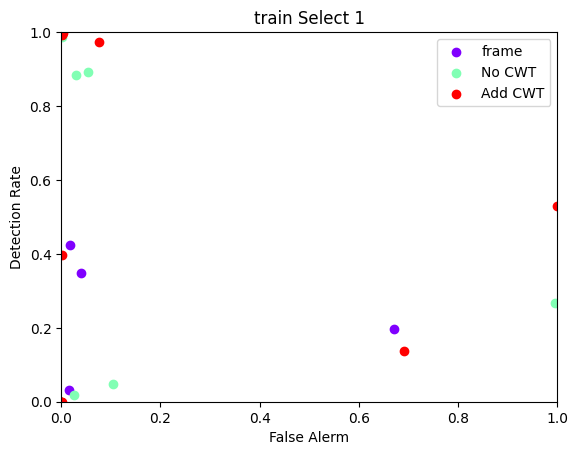

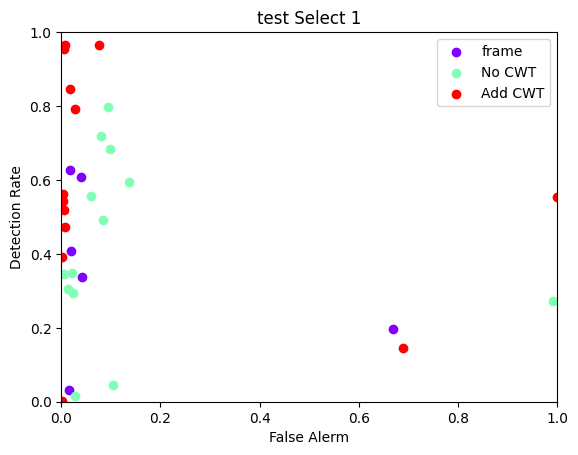

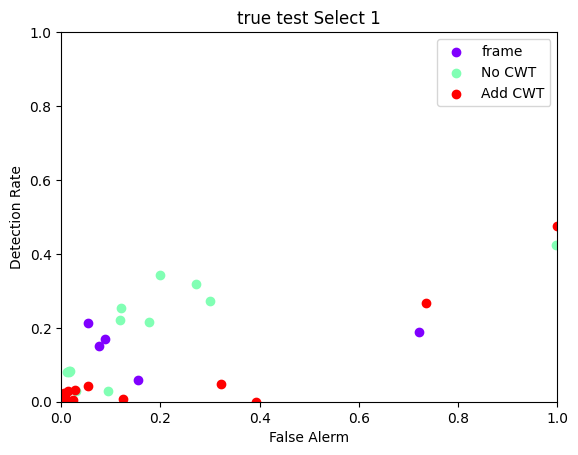

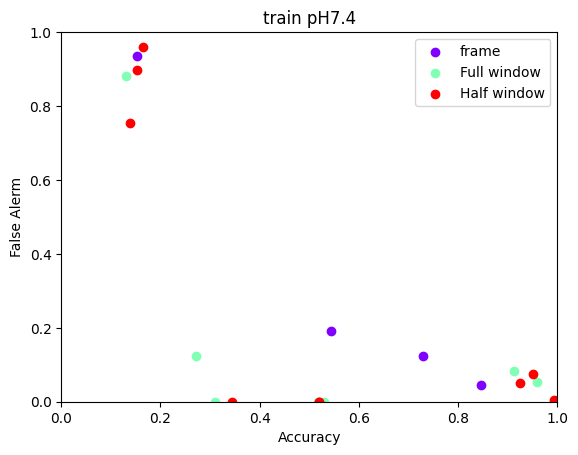

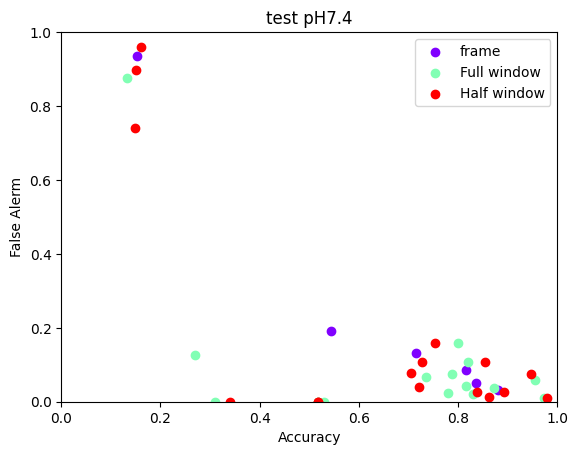

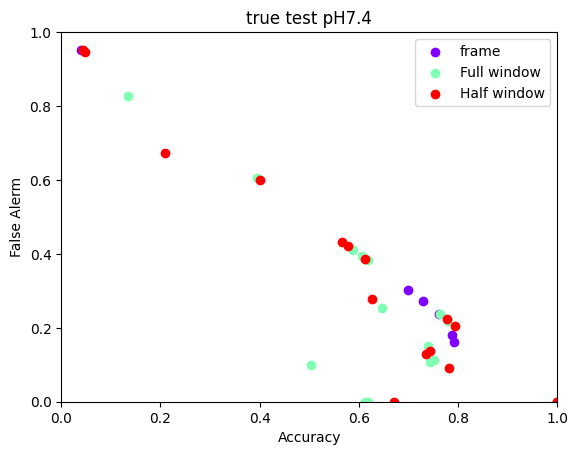

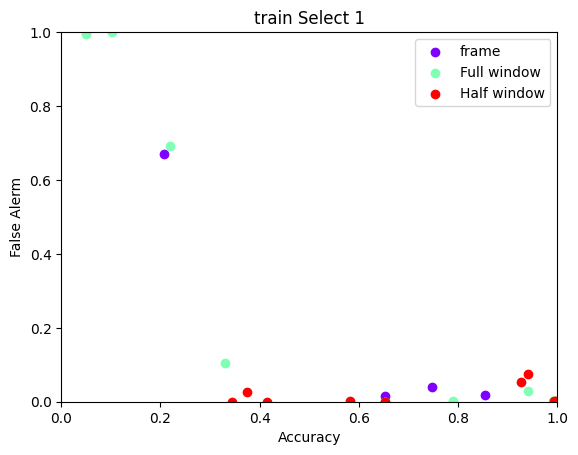

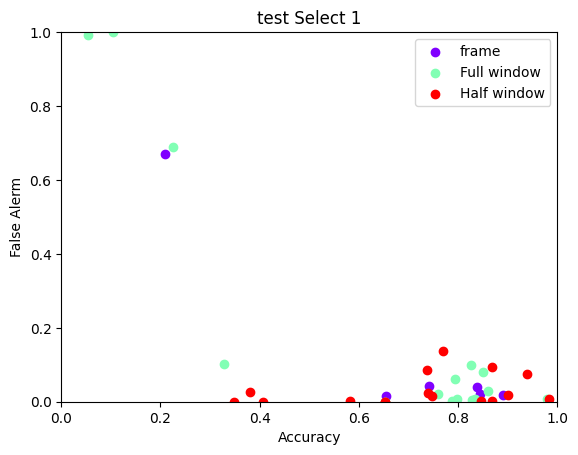

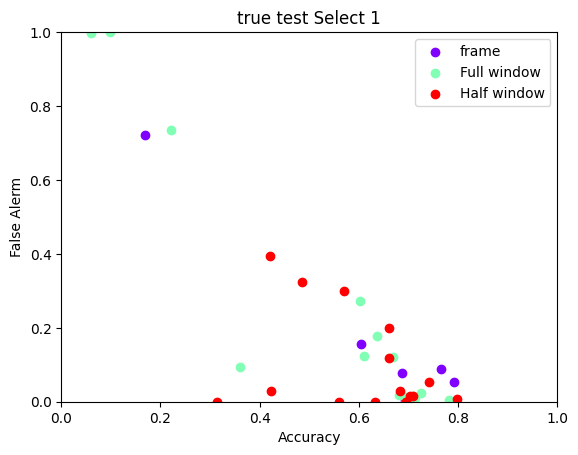

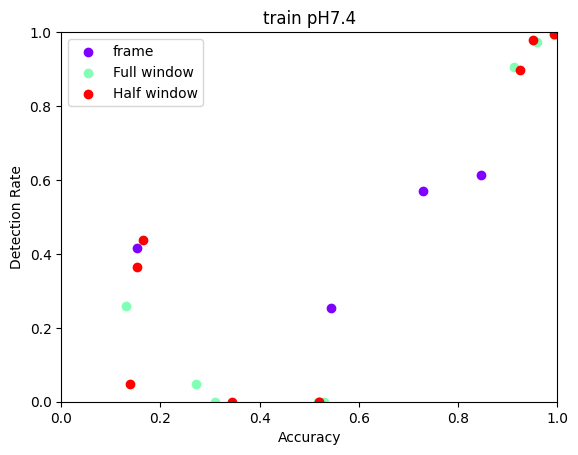

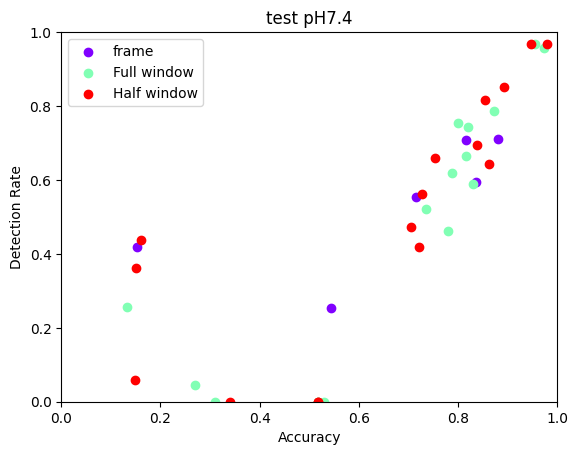

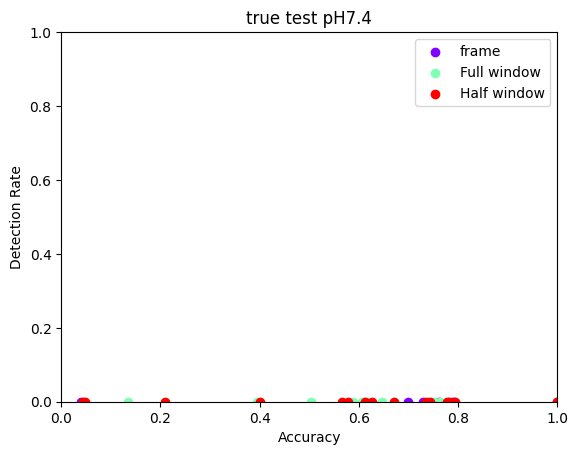

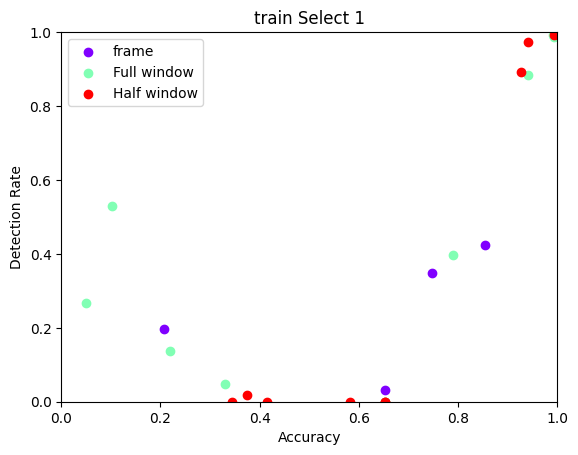

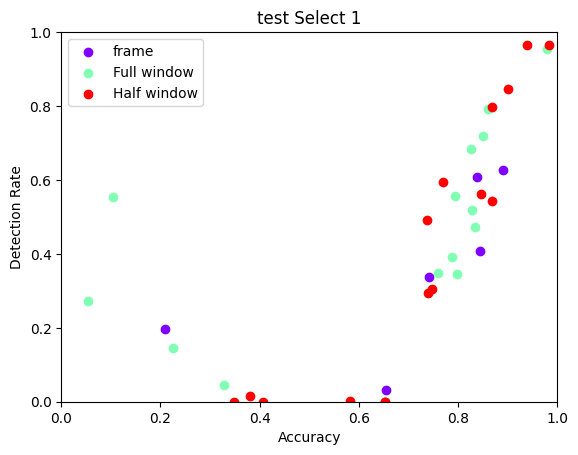

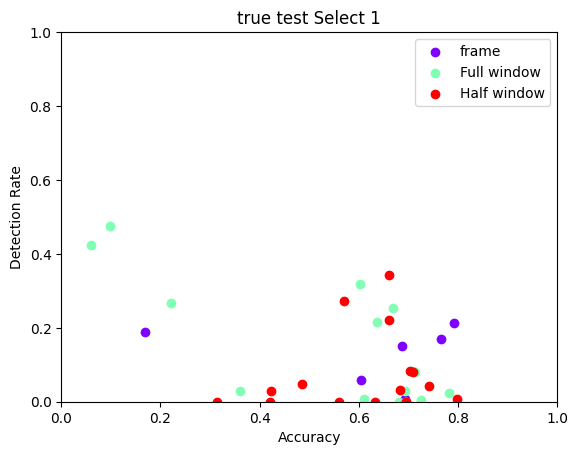

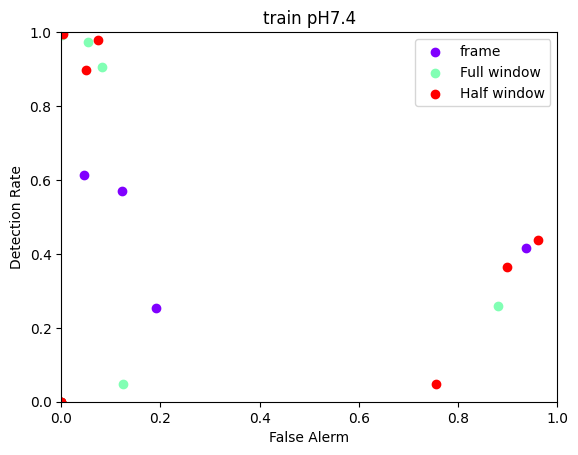

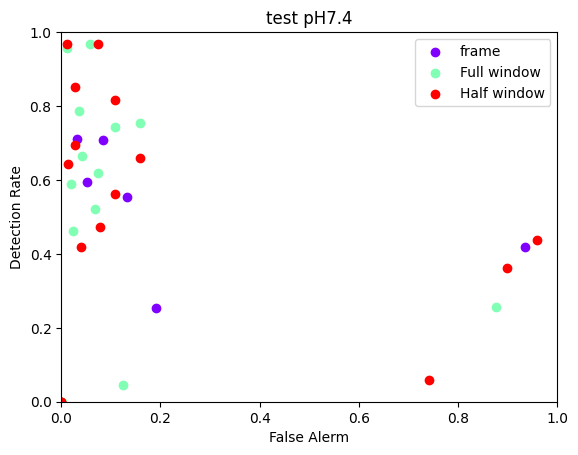

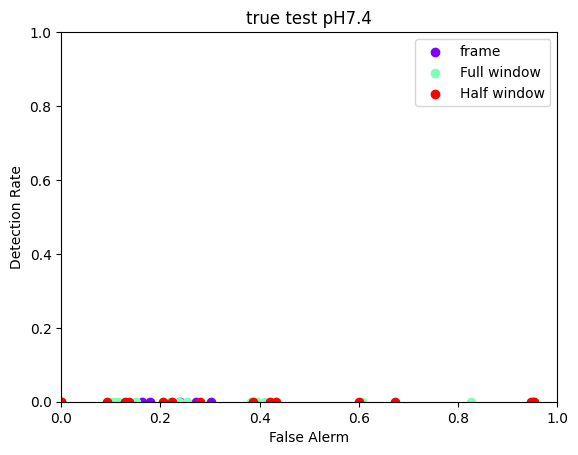

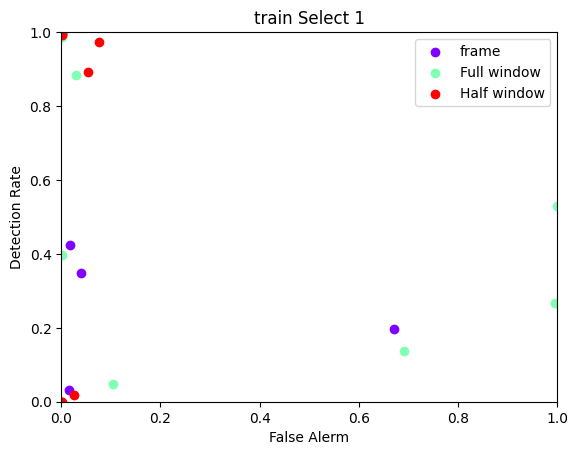

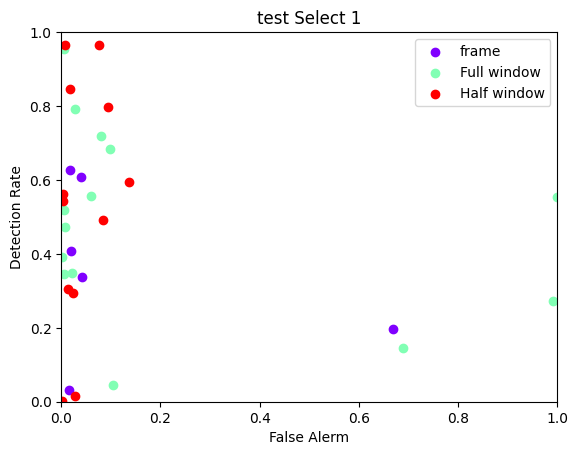

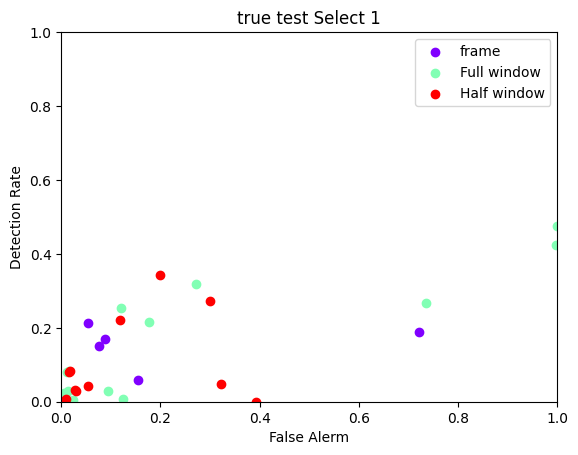

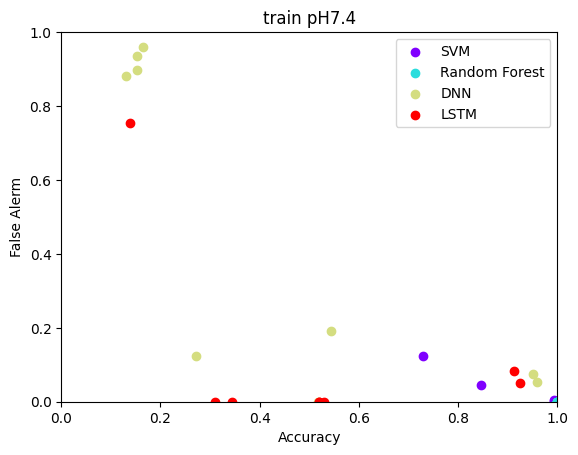

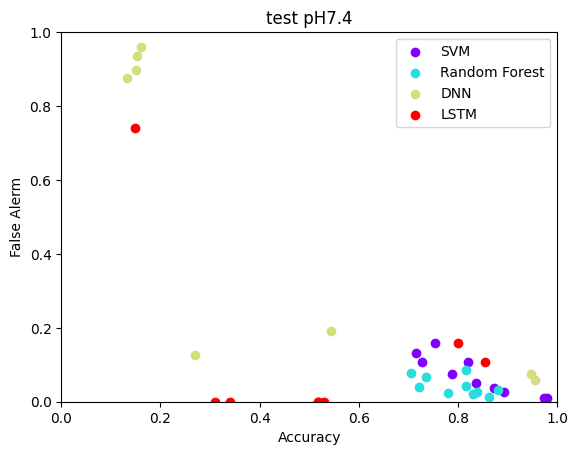

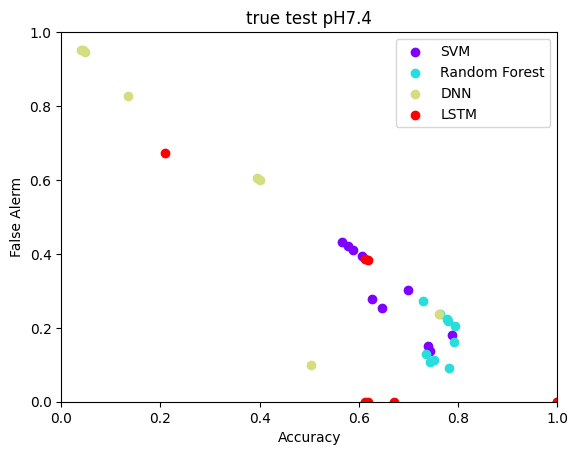

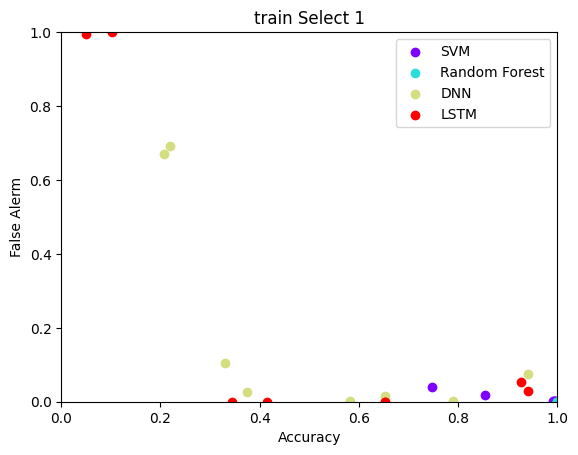

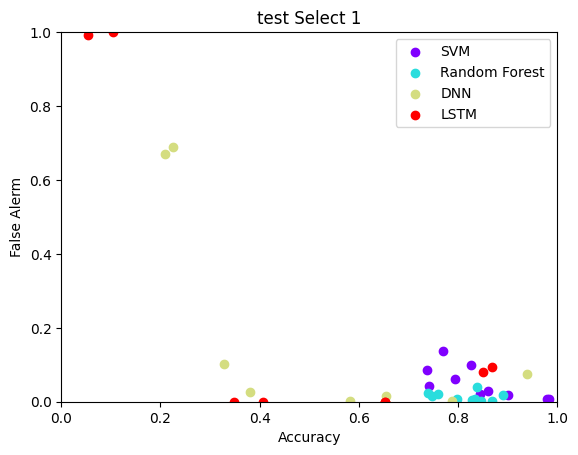

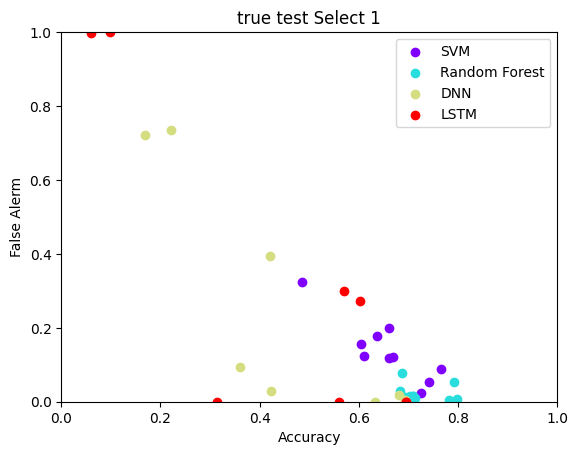

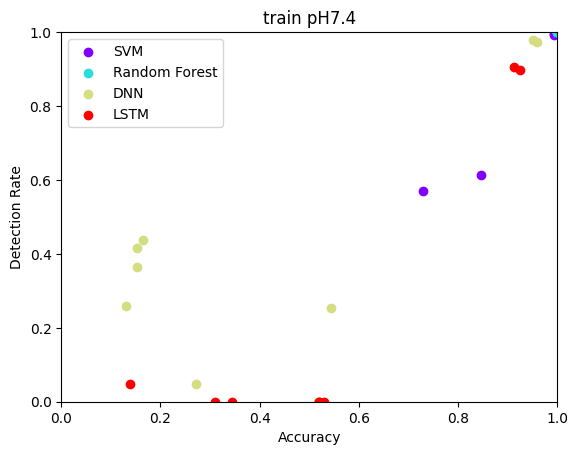

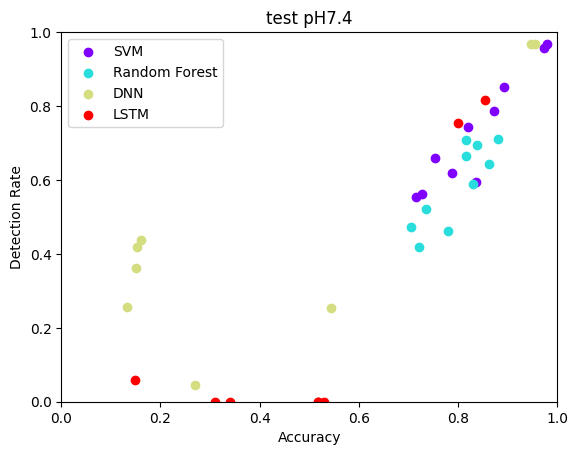

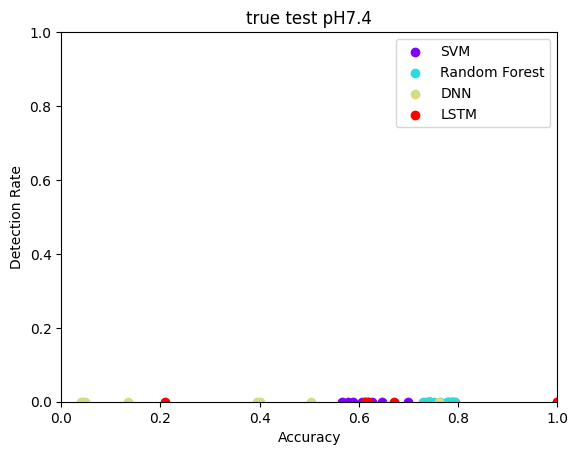

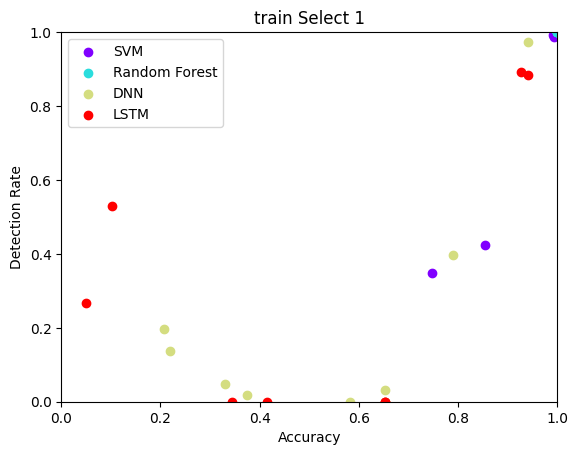

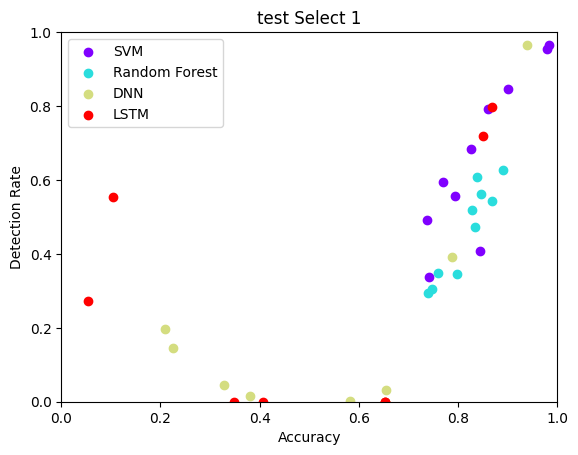

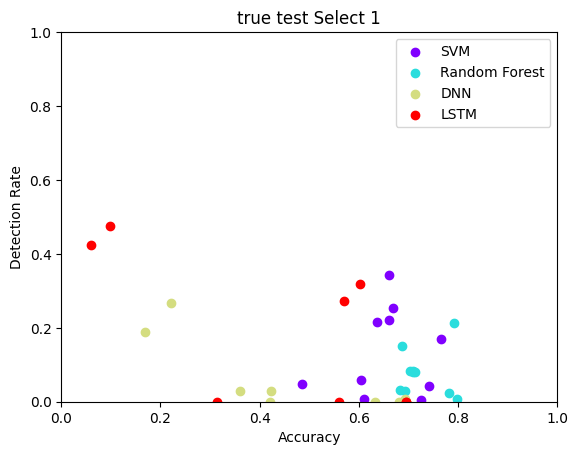

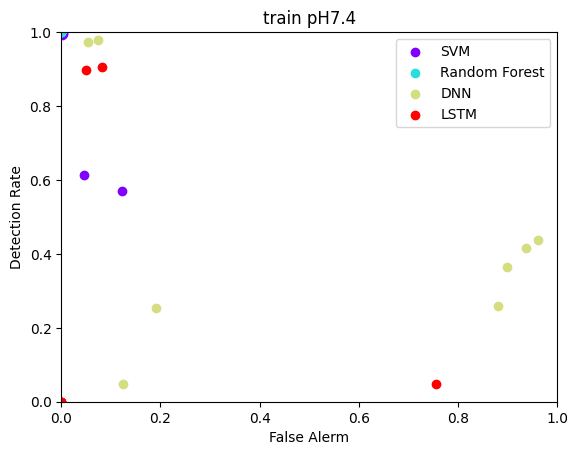

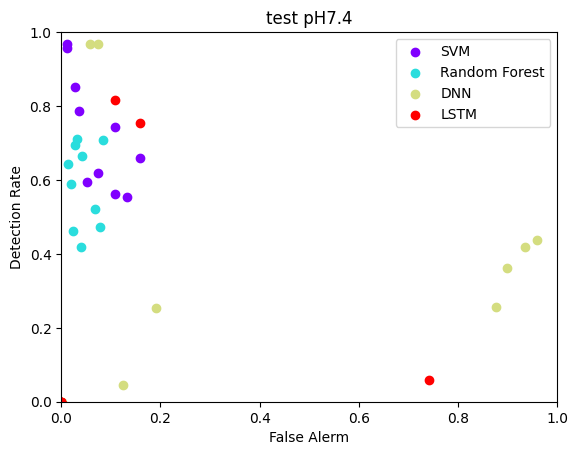

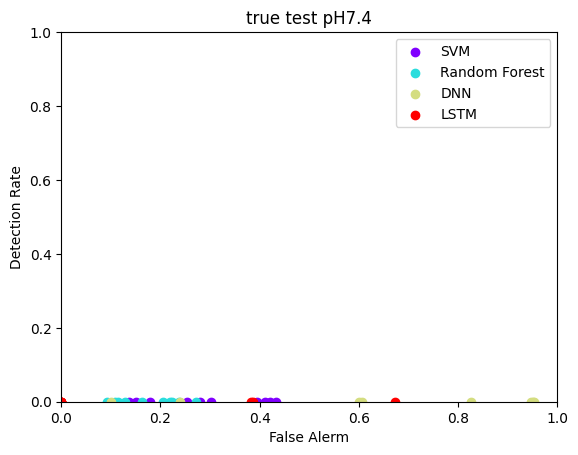

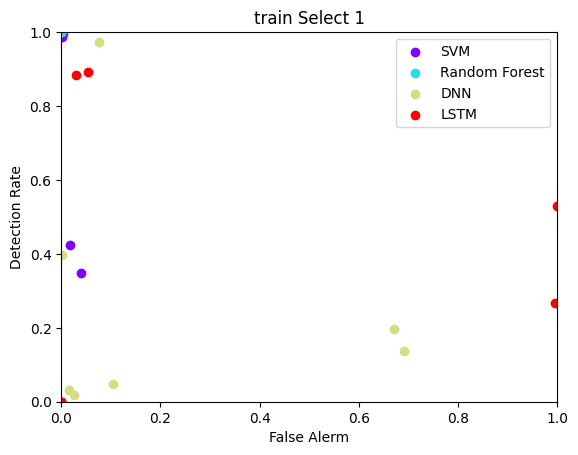

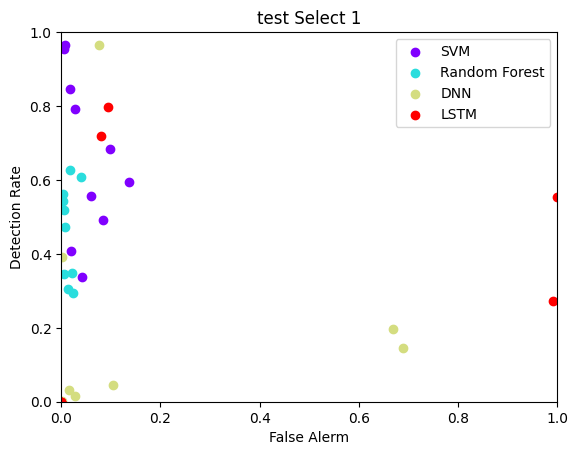

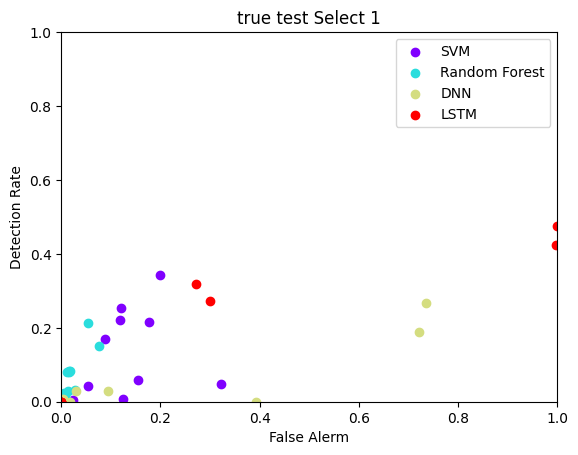

In [10]:
# compare
for compare in [0,1,2,3,4]:# 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
    # axis select
    for ax1, ax2 in [[0,1],[0,2],[1,2]]:
        # axes
        axes = ['Accuracy', 'False Alerm', 'Detection Rate']
        axess = ['ACC','FA','DR']
        # subplots
        cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
                ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
        subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
                    'train Select 1','test Select 1','true test Select 1']
        # select exp
        if compare == 0:
            compares = ['N','Y']
            legends = ['No cluster', 'Add cluster']
            cmp_title = 'Clustser'
        elif compare == 1:
            compares = ['F','S']
            legends = ['Frame', 'Segment']
            cmp_title = 'FrameOrSegment'
        elif compare == 2:
            compares = ['-','N','Y']
            legends = ['frame','No CWT', 'Add CWT']
            cmp_title = 'CWT'
        elif compare == 3:
            compares = ['-','F','H']
            legends = ['frame','Full window', 'Half window']
            cmp_title = 'Window'
        elif compare == 4:
            compares = ['svm', 'RF', 'DNN', 'LSTM']
            legends = ['SVM', 'Random Forest', 'DNN', 'LSTM']
            cmp_title = 'Model'
        colors = cm.rainbow(np.linspace(0, 1, len(compares)))
        title = cmp_title+'_Compare_'+axess[ax1]+'-'+axess[ax2]
        save_path = save_root+title+'/'
        if not os.path.isdir(save_path):
            os.makedirs(save_path)

        for i in range(6):
            ax = cols[i]
            plt.figure()
            for j, cmp in enumerate(compares):
                x = df[df.iloc[:,compare]==cmp][ax[ax1]].tolist()
                y = df[df.iloc[:,compare]==cmp][ax[ax2]].tolist()
                plt.scatter(x,y, color=colors[j], label=legends[j])
            plt.title(subtitles[i])
            plt.xlim(0,1)
            plt.xlabel(axes[ax1])
            plt.ylim(0,1)
            plt.ylabel(axes[ax2])
            plt.legend()
            plt.savefig(save_path+title+str(i+1)+'.png')